In [189]:
# import the libraries

## WebScrapping Libraries
from bs4 import BeautifulSoup
import requests
import urllib.request

## NLP and ML Libraries
import nltk
from newspaper import Article
nltk.download('floresta') # "Portuguese Treebank" divides the text into a list of sentences using ML algorithm
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Data Frame manipulation and Analytics Libraries
import pandas as pd
import time
import matplotlib.pyplot as plt
import plotly_express as px
import datetime



[nltk_data] Downloading package floresta to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package floresta is already up-to-date!


In [203]:
# Create a function to scrape the website

def scrape_cnn_website(search, page):
# """ 
# Scrapes the CNN Website based on a theme and a page number.
# """

    page_theme = search
    page_number = str(page)

    url = 'https://www.cnnbrasil.com.br/tudo-sobre/' + page_theme + '/' + 'pagina' + page_number +'/' 
    webpage = requests.get(url)
    soup = BeautifulSoup(webpage.text, 'html.parser')

    # Get the location of the information
    article_date = soup.find_all('span', attrs= {'class': 'home__title__date'}) # location of data information
    article_title = soup.find_all('h2', attrs= {'class': 'news-item-header__title'} ) # location of title information
    article_tag = soup.find_all('span', attrs= {'class': 'latest__news__category'} ) # location of the tag
    article_theme = soup.find_all('h1', attrs= {'class': 'tags__topics__title'} ) # location of the theme
    article_links = soup.find_all('a',attrs={'class': 'home__list__tag'} )# location of the links

    # Loop through the article_date
    for i in article_date:
        temp=0
        temp = i.text.strip()
        date = temp[0:10]
        time = temp[14:19]
        date_time = date +'-'+ time

        date_time = pd.to_datetime(date_time,format= '%d/%m/%Y-%H:%M').strftime('%d/%m/%Y - %H:%M')
        dates.append(date_time)

    # Loop through the article_titles and set the theme
    for i in article_title:
        temp = 0
        temp = i.text.strip()
        title.append(temp)
        theme.append(article_theme[0].text.strip().split()[2])

    # Loop through the article_tags
    for i in article_tag:
        temp = 0
        temp = i.text.strip()
        tag.append(temp)

    # Loop through the article_links
    for i in article_links:
        href = i.get('href')
        links.append(href)

        # NLP Process: Scrapes the article, download the information and parse a nlp into a interable object
        article = Article(href) # Scrapes the Article
        article.download()
        article.parse()
        article.nlp()

        # Interact with the articles
        site_name = article.meta_data['og']['site_name']
        text = article.text
        summary = article.summary
        texts.append(text)
        summarys.append(summary)
        authors.append(site_name)


In [212]:
# Create lists to store the scraped data
theme = []
tag = []
title = []
authors = []
dates = []
links = []
texts = []
summarys = []

# Number of pages to scrap
## min = 1
n = 1

# search theme
## use '-' for spacing
## samples: 'energia' ; 'energia-renovavel' ; 'energias-renováveis-no-brasil'
search_theme = 'energia'


# performs the scrapping with the chosen search on the given pages
for i in range(1 , n+1):

    #applies the function
    scrape_cnn_website(search_theme, i )

    # checks how many lines are created for each page
    print(i,        # page
    len(authors),  
    len(links), 
    len(theme), 
    len(tag), 
    len(title),
    len(dates), 
    len(texts), 
    len(summarys) 
)

1 30 30 30 30 30 30 30 30


In [213]:
# creates a dataframe based on the stored lists
df = pd.DataFrame( columns= ['dates','theme','authors','tag','title','summarys','texts','links' ] )
df.dates = dates
df.dates = pd.to_datetime(df.dates,format= '%d/%m/%Y - %H:%M')
df.theme = theme
df.authors = authors
df.tag = tag
df.title = title
df.summarys = summarys
df.texts = texts
df.links = links

# check the analyzed dates
date_min = str(df.dates.dt.date.min().strftime('%d/%m/%Y'))+' at '+ str(df.dates.dt.time.min())
date_max = str(df.dates.dt.date.max().strftime('%d/%m/%Y'))+' at '+ str(df.dates.dt.time.max())
df_date_range = 'DF Date Rage: from ['+ date_min + '] to [' + date_max + ']'
print(df_date_range)

# checks if the dataframe has null values
df.isnull().sum()

DF Date Rage: from [19/04/2022 at 04:30:00] to [13/05/2022 at 21:32:00]


dates       0
theme       0
authors     0
tag         0
title       0
summarys    0
texts       0
links       0
dtype: int64

In [214]:
# filter by date
df_filtered = df[df.dates > '2022-01-01']


# check the analyzed dates
date_min = str(df_filtered.dates.dt.date.min().strftime('%d/%m/%Y'))+' at '+ str(df_filtered.dates.dt.time.min())
date_max = str(df_filtered.dates.dt.date.max().strftime('%d/%m/%Y'))+' at '+ str(df_filtered.dates.dt.time.max())

# range of dates
date_range = 'Date Rage: from ['+ date_min + '] to [' + date_max + ']'
print(date_range)

# data vizualization
df_filtered


Date Rage: from [19/04/2022 at 04:30:00] to [13/05/2022 at 21:32:00]


,dates,theme,authors,tag,title,summarys,texts,links
0,2022-05-13 16:35:00,Energia,CNN Brasil,Internacional,Rússia cortará fornecimento de eletricidade pa...,"“A RAO Nordic Oy, uma subsidiária da entidade ...",Operadora do sistema de transmissão da Finlând...,https://www.cnnbrasil.com.br/internacional/rus...
1,2022-05-13 07:32:00,Energia,CNN Brasil,Business,Produção industrial da zona do euro cai menos ...,"Em termos anuais, a produção de energia caiu 4...","Em termos anuais, a produção de energia caiu 4...",https://www.cnnbrasil.com.br/business/producao...
2,2022-05-12 16:42:00,Energia,CNN Brasil,Business,Europa está ficando sem tempo para encontrar a...,A Rússia respondeu por cerca de 45% das import...,"""Os governos precisam agir agora como se estiv...",https://www.cnnbrasil.com.br/business/europa-e...
3,2022-05-10 14:29:00,Energia,CNN Brasil,Business,Rússia precisa vender petróleo e está ficando ...,Países como a Índia continuam abocando centena...,Tanques de petróleo em Omsk na Rússia: receita...,https://www.cnnbrasil.com.br/business/russia-p...
4,2022-05-10 09:21:00,Energia,CNN Brasil,Nacional,A “minirreforma tributária” e o déjà vu do con...,A intenção de Guedes é mexer nas alíquotas par...,Thais Herédia e Priscila Yazbek apresentam o p...,https://www.cnnbrasil.com.br/nacional/podcast-...
5,2022-05-09 09:32:00,Energia,CNN Brasil,Nacional,Mercado acredita que inflação nos EUA e Brasil...,Os investidores estão cautelosos com a divulga...,Thais Herédia e Priscila Yazbek apresentam o p...,https://www.cnnbrasil.com.br/nacional/podcast-...
6,2022-05-05 17:22:00,Energia,CNN Brasil,Business,"Mais petróleo pode ser liberado, se necessário...","De acordo com ele, só uma parte dos estoques d...",Soluções do lado da demanda também são importa...,https://www.cnnbrasil.com.br/business/mais-pet...
7,2022-05-05 07:50:00,Energia,CNN Brasil,Business,Japão utilizará reatores nucleares para reduzi...,Primeiro-ministro prometeu 150 trilhões de ien...,Primeiro-ministro prometeu 150 trilhões de ien...,https://www.cnnbrasil.com.br/internacional/jap...
8,2022-05-04 21:32:00,Energia,CNN Brasil,Business,Senado aprova projeto que deve facilitar linha...,O texto declara que a passagem da rede elétric...,"Governador de Roraima, Antonio Denarium, se re...",https://www.cnnbrasil.com.br/business/senado-a...
9,2022-05-04 08:50:00,Energia,CNN Brasil,Business,Opep+ vê superávit maior em 2022 em meio a cre...,Ilustração fotográfica com uma bomba de extraç...,Ilustração fotográfica com uma bomba de extraç...,https://www.cnnbrasil.com.br/business/opep-ve-...


In [215]:
# NLP: stopword parametres

## github patch with Brazilian stopwords
PORTUGUESE_STOPWORDS_PATCH_1 = r'https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt' ##online patch
response_PATCH = requests.get(PORTUGUESE_STOPWORDS_PATCH_1) ## accessing via webscrapping
pt_stopwords = response_PATCH.text ## assigning to a variable
pt_stopwords = pt_stopwords.replace(" ","").splitlines() ## manipulating extraction

# WordCloud text and additional parameters

text = " ".join(s.lower() for s in df_filtered.texts) # lowercasing all the text words
wordcloud_theme = df_filtered.theme[0].lower() # get the search theme
wordcloud_search_theme = search_theme
wordcloud_title = 'Author: '+ df_filtered.authors[0]+' │ Theme: ' + search_theme +' │ '+ date_range # setting the title


## manual stopwords input
manual_stopwords = [wordcloud_theme,

                                                    'cerca',
                                                    'país',
                                                    'disse',
                                                    'agora',
                                                    'ouvir',
                                                    'notícia',
                                                    'ano' ,
                                                    'entanto',
                                                    'episódio',
                                                    'ainda',
                                                    'acordo',
                                                    'demanda',
                                                    'maior',
                                                    'dia',
                                                    'segundo',
                                                    'pode',
                                                    'desde',
                                                    'todo',
                                                    'sobre',
                                                    'getty',
                                                    'getty images',
                                                    'anadolu',
                                                    'images',
                                                    'agency',
                                                    'ante',
                                                    'após',
                                                    'segunda',
                                                    'terça',
                                                    'quarta',
                                                    'quinta',
                                                    'sexta',
                                                    'sabado',
                                                    'domingo',
                                                    'feira',
                                                    'enquanto',
                                                    'deve',
                                                    'semana',
                                                    'nesta',
                                          'caso',
                                          'diz',
                                          'hoje',
                                          'brasil',
                                          'empresa',
                                          'grande',
                                          'fonte',
                                          'renovável',
                                          'afirma',
                                          'área',
                                          'uso',
                                          'capacidade',
                                          'apenas',
                                          'partir',
                                          'projeto',
                                          'cnn',
                                          'passado',
                                          'partir',
                                          'porque',
                                          'custo',
                                          'exemplo',
                                          'especialista',
                                          'skydweller',
                                          'vai',
                                          'outra',
                                          'gera',
                                          'loja'
                                                   ]

## stopwords used
stop_words  = list(pt_stopwords) + list(STOPWORDS) + list(manual_stopwords) 



# WordCloud NLP algorithm

## WordCloud Figure
wordcloud = WordCloud(min_font_size=50, 
               max_font_size=500, 
               background_color='white', 
            #    max_words = 80,
               mode="RGB",
               colormap='tab10',
               stopwords=stop_words,
               width=3000, 
               height=1500,
               normalize_plurals= True
).generate(text)

## WordCloud Text Count
wordcloud_text = WordCloud(min_font_size=50, 
               max_font_size=500, 
               background_color='white', 
               mode="RGB",
               colormap='tab10',
               stopwords=stop_words,
               width=3000, 
               height=1500,
               normalize_plurals= True
).process_text(text)


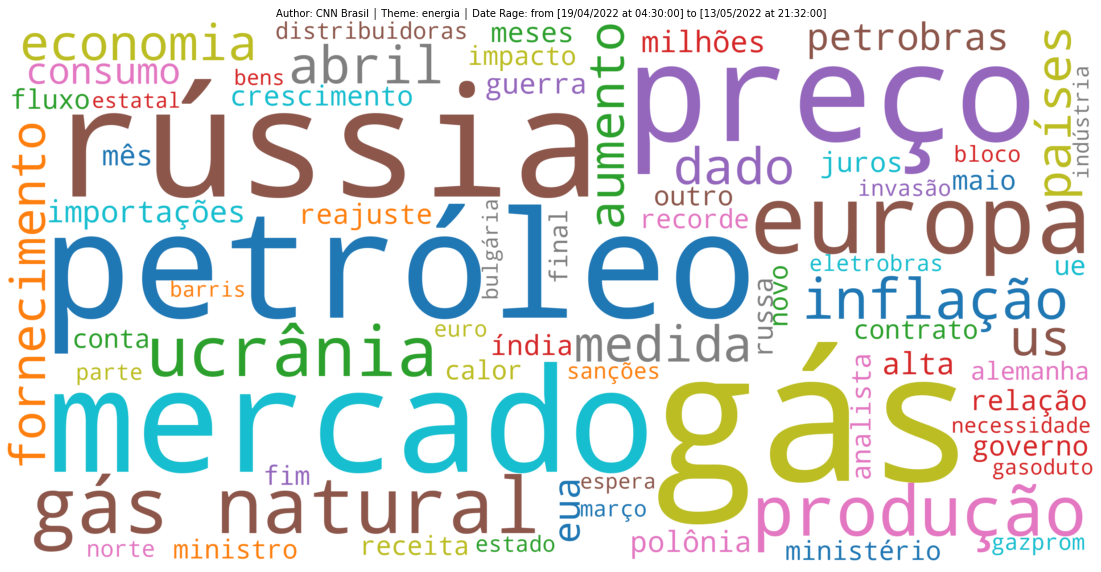

In [216]:
# Ploting the WordCloud figure
plt.figure(figsize=(20,10))
plt.title(wordcloud_title, fontsize=10, color="black")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [217]:
# iterative scatter analysis with wordcloud words

## creating a dataframe with the dictionary generated by the NLP algorithm
df2 = pd.DataFrame.from_dict(wordcloud_text, orient='index') # generating a dataframe from a dictionary
df2 = df2.rename(columns={0:'count'}) 
df2['word'] = df2.index
df2 = df2.reset_index(drop=True)
df2 = df2[['word','count']]


## generating a scatterplot from the plotfy library
fig = px.scatter(df2.query('count > 10'),
                y="count",
                size="count",
                color="word",
                hover_name="word",
                log_x=True,
                title = wordcloud_title,
                width=1500, 
                height=750,
                size_max=60)
fig.show()


